# Classification Problem using ANN

A brif introduction about the dataset:

Basically, we are given a dataset of a bank and the bank wants us to predict whether a person will leave the bank or not based on the given information.



## 1) Importing the libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [71]:
#Checking if cuda is available
torch.cuda.is_available()

True

## 2) DataPreprocessing

Reading the data from the file.

In [2]:
df = pd.read_csv('./Data/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Checking the information of each column

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<b>Dividing the dataset into features and labels</b>

In [0]:
X = df[['CreditScore', 'Geography','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]
y = df['Exited']
       

<b>Checking if there are any null values or some missing values in features and labels</b>

In [6]:
X.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [7]:
y.isnull().sum() 

0

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


<b>Since, there are categorical as well continous data,so we divide the features and labels into categorical,continous and labelled data</b>

In [0]:
categorical_cols = ['Geography','Gender']
continous_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']
y_cols = ['Exited']       

In [10]:
for cat in categorical_cols:
  X[cat] = X[cat].astype('category')

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
dtypes: category(2), float64(2), int64(6)
memory usage: 644.9 KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
X['Gender'].cat.categories

Index(['Female', 'Male'], dtype='object')

In [12]:
X['Gender'].cat.codes

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Length: 10000, dtype: int8

In [13]:
X['Gender'].cat.codes.values

array([0, 0, 0, ..., 0, 1, 0], dtype=int8)

In [14]:
X['Geography'].cat.categories

Index(['France', 'Germany', 'Spain'], dtype='object')

In [15]:
X['Geography'].cat.codes.values

array([0, 2, 0, ..., 0, 1, 0], dtype=int8)

In [16]:
X['Geography'].cat.codes

0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Length: 10000, dtype: int8

In [0]:
gender = X['Gender'].cat.codes.values
geo = X['Geography'].cat.codes.values

<b>Converting the data into One-hot encoder</b>

In [29]:
categorical = np.stack([geo,gender],axis = 1)
categorical

array([[0, 0],
       [2, 0],
       [0, 0],
       ...,
       [0, 0],
       [1, 1],
       [0, 0]], dtype=int8)

In [73]:
categorical = torch.tensor(categorical,dtype=torch.int64)
categorical

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


tensor([[0, 0],
        [2, 0],
        [0, 0],
        ...,
        [0, 0],
        [1, 1],
        [0, 0]])

In [31]:
continous = np.stack([X[col].values for col in continous_cols],1)
continous

array([[6.1900000e+02, 4.2000000e+01, 2.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 4.1000000e+01, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 4.2000000e+01, 8.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 3.6000000e+01, 7.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 4.2000000e+01, 3.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [7.9200000e+02, 2.8000000e+01, 4.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [32]:
continous = torch.tensor(continous,dtype=torch.float)
continous

tensor([[6.1900e+02, 4.2000e+01, 2.0000e+00,  ..., 1.0000e+00, 1.0000e+00,
         1.0135e+05],
        [6.0800e+02, 4.1000e+01, 1.0000e+00,  ..., 0.0000e+00, 1.0000e+00,
         1.1254e+05],
        [5.0200e+02, 4.2000e+01, 8.0000e+00,  ..., 1.0000e+00, 0.0000e+00,
         1.1393e+05],
        ...,
        [7.0900e+02, 3.6000e+01, 7.0000e+00,  ..., 0.0000e+00, 1.0000e+00,
         4.2086e+04],
        [7.7200e+02, 4.2000e+01, 3.0000e+00,  ..., 1.0000e+00, 0.0000e+00,
         9.2889e+04],
        [7.9200e+02, 2.8000e+01, 4.0000e+00,  ..., 1.0000e+00, 0.0000e+00,
         3.8191e+04]])

In [33]:
y = torch.tensor(df[y_cols].values, dtype= torch.float)
y

tensor([[1.],
        [0.],
        [1.],
        ...,
        [1.],
        [1.],
        [0.]])

In [34]:
y = y.reshape(-1,1)
y

tensor([[1.],
        [0.],
        [1.],
        ...,
        [1.],
        [1.],
        [0.]])

In [35]:
categorical.shape , continous.shape, y.shape

(torch.Size([10000, 2]), torch.Size([10000, 8]), torch.Size([10000, 1]))

In [36]:
#Now we perform ont hot encoding using Embedding layer function of nn.Module

cats_size = [len(X[col].cat.categories) for col in categorical_cols]
cats_size

[3, 2]

In [37]:
emp_size = [(size,min((size+1)//2,50)) for size in cats_size]
emp_size

[(3, 2), (2, 1)]

In [38]:
selfembeds = nn.ModuleList([nn.Embedding(n1,n2) for n1,n2 in emp_size])
selfembeds

ModuleList(
  (0): Embedding(3, 2)
  (1): Embedding(2, 1)
)

In [39]:
embeddingz = []

for i,e in enumerate(selfembeds):
  embeddingz.append(e(categorical[:,i]))
embeddingz  

[tensor([[ 1.5795, -0.8460],
         [ 0.0616,  0.1401],
         [ 1.5795, -0.8460],
         ...,
         [ 1.5795, -0.8460],
         [ 0.5649,  1.0072],
         [ 1.5795, -0.8460]], grad_fn=<EmbeddingBackward>), tensor([[0.3384],
         [0.3384],
         [0.3384],
         ...,
         [0.3384],
         [0.5497],
         [0.3384]], grad_fn=<EmbeddingBackward>)]

In [40]:
z = torch.cat(embeddingz,1)  #Above we can see that there are different tensors for the 3 columns,so we merged them.
z, z.shape

(tensor([[ 1.5795, -0.8460,  0.3384],
         [ 0.0616,  0.1401,  0.3384],
         [ 1.5795, -0.8460,  0.3384],
         ...,
         [ 1.5795, -0.8460,  0.3384],
         [ 0.5649,  1.0072,  0.5497],
         [ 1.5795, -0.8460,  0.3384]], grad_fn=<CatBackward>),
 torch.Size([10000, 3]))

#### Shifting everything to GPU

In [0]:
categorical = categorical.cuda()
continous = continous.cuda()
y = y.cuda()

## 3) Defining the model

In [0]:
class ANN(nn.Module):

  def __init__(self, emp_size, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emp_size])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emp_size))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
  def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return F.sigmoid(x)    

In [0]:
torch.manual_seed(33)
model = ANN(emp_size,continous.shape[1],1,[200,200],p=0.4)

In [95]:
gpu_model = model.cuda()
gpu_model

ANN(
  (embeds): ModuleList(
    (0): Embedding(3, 2)
    (1): Embedding(2, 1)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=11, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=200, out_features=200, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=200, out_features=1, bias=True)
  )
)

## 4) Defining the loss function and optimizer

- For loss function : https://stackoverflow.com/questions/53628622/loss-function-its-inputs-for-binary-classification-pytorch



In [0]:
## 4) Defining the loss function and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

## 5) Splitting the Data into Training,Validation and Testing set

In [97]:
len(categorical)

10000

We will be taking 70% data as training, 15% as validation and 15% as testing set.

In [98]:
size = int(len(categorical)*0.7)
val = int(len(categorical)*0.15)
cat_train, cont_train, y_train = categorical[:size], continous[:size], y[:size]
cat_val, cont_val, y_val = categorical[size:size+val], continous[size:size+val], y[size:size+val]
cat_test, cont_test, y_test = categorical[size+val:], continous[size+val:], y[size+val:]
print(len(cat_train), len(cont_train), len(y_train))
print(len(cat_val), len(cont_val), len(y_val))
print(len(cat_test), len(cont_test), len(y_test))

7000 7000 7000
1500 1500 1500
1500 1500 1500


## 6) Training the model

In [99]:
import time
start_time = time.time()

epochs = 1001
losses = []
gpu_model.train()
for i in range(epochs):
    i+=1

    ############# Training #############
    y_train_pred = gpu_model(cat_train, cont_train)
    loss = criterion(y_train_pred, y_train)
    losses.append(loss)
    
    ############# Validation ############
    if i%100 == 0:
      model.eval()

      y_val_pred = gpu_model(cat_val,cont_val)
      losse = criterion(y_val_pred,y_val)
      print(f'epoch: {i}  loss: {loss.item()}')
      
      gpu_model.train()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'\nDuration: {(time.time() - start_time)/60} minutes') # print the time elapsed

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch: 100  loss: 0.3928211033344269
epoch: 200  loss: 0.3555922508239746
epoch: 300  loss: 0.34159180521965027
epoch: 400  loss: 0.337443470954895
epoch: 500  loss: 0.32979485392570496
epoch: 600  loss: 0.32454419136047363
epoch: 700  loss: 0.31595611572265625
epoch: 800  loss: 0.3158656060695648
epoch: 900  loss: 0.3097360134124756
epoch: 1000  loss: 0.3072647452354431

Duration: 0.09483950138092041 minutes


Loss function can be further minimized by increasing the epochs , or changing the number of neurons in the hidden layer or increasing the number of hidden layers.

## 7) Plotting the graph between Epochs and losses

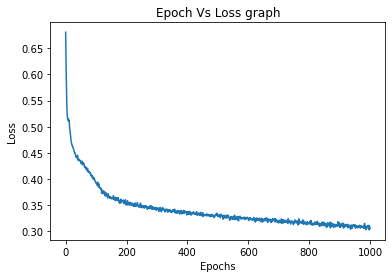

In [100]:
plt.plot(range(epochs),losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epoch Vs Loss graph");

## 8) Testing the model

In [101]:
with torch.no_grad():
  y_test_pred = gpu_model(cat_test,cont_test)
  loss = criterion(y_test_pred,y_test)

print(f'Loss : {loss.item()}');

Loss : 0.377574622631073


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [104]:
y_test_pred.flatten()

tensor([0.0764, 0.0080, 0.0079,  ..., 0.1813, 0.0672, 0.0907], device='cuda:0')

In [115]:
y_test = y_test.flatten()
y_test

array([0., 0., 0., ..., 1., 1., 0.], dtype=float32)

In [120]:
results = []
for i in y_test_pred.flatten():
  if i > 0.5:
    results.append(1)
  else:
    results.append(0)  
    
results = np.array(results,dtype = float)
results

array([0., 0., 0., ..., 0., 0., 0.])

In [121]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test,results)
c

array([[1158,   69],
       [ 158,  115]])

In [123]:
accuracy = (1158+115)/1500
accuracy*100

84.86666666666667

## 9) Saving the model

In [0]:
torch.save(model.state_dict(),'Classification_Model.pt')